In [1]:
import numpy as np
import pandas as pd
import scipy

import statsmodels
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, scipy, statsmodels, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
statsmodels 0.11.1
matplotlib 3.5.3
seaborn 0.12.2


# 2-7 회귀 분석

## 0. 데이터셋 소개

### Wild blueberry

[Wild blueberry](https://data.mendeley.com/datasets/p5hvjzsvn8/1) 야생 블루베리의 수확량을 시뮬레이션한 데이터셋입니다.


|Features|Unit|Description|
|:--------|:----|:-----------|
|Row#||Index|
|clonesize|m2|The average blueberry clone size in the field|
|honeybee|bees/m2/min|Honeybee density in the field|
|bumbles|bees/m2/min|Bumblebee density in the field|
|andrena|bees/m2/min|Andrena bee density in the field|
|osmia|bees/m2/min|Osmia bee density in the field|
|MaxOfUpperTRange|℃|The highest record of the upper band daily air temperature during the bloom season|
|MinOfUpperTRange|℃|The lowest record of the upper band daily air temperature|
|AverageOfUpperTRange|℃|The average of the upper band daily air temperature|
|MaxOfLowerTRange|℃|The highest record of the lower band daily air temperature|
|MinOfLowerTRange|℃|The lowest record of the lower band daily air temperature|
|AverageOfLowerTRange|℃|The average of the lower band daily air temperature|
|RainingDays|Day|The total number of days during the bloom season, each of which has precipitation larger than zero|
|AverageRainingDays|Day|The average of raining days of the entire bloom season|
|fruitset||The amount of fruit per tree|
|fruitmass||The mass of a fruit|
|seeds||The mass of a seed|
|yield||The amount of yield|


In [2]:
df_berry = pd.read_csv('data/wild_blueberry.csv')
df_berry.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


## 1. 선형 회귀(Linear Regression)

### 구성 요소

- 표현법 1: 수열 형태

$\{y_i, x_{i1}, ... , x_{ip}\}_{i=1}^n$

$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ...  + \beta_px_{ip} + \epsilon_i = x_i^T\beta + \epsilon_i$

---------------------
- 표현법 2: 벡터 형태

$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$, 
$\mathbf{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_1 \\ \vdots \\ \epsilon_n \end{bmatrix}$,
$\mathbf{x_i} = \begin{bmatrix} 1 \\ x_{i1} \\ \vdots \\ x_{ip} \end{bmatrix}$,
$\mathbf{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix}$

$\mathbf{X} = \begin{bmatrix} x_0^T \\ x_1^T \\ \vdots \\ x_n^T \end{bmatrix}$ = 
$\begin{bmatrix} 1 & x_{11} & x_{12} & \ldots & x_{1p} \\ 1 & x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \ldots & x_{np} \end{bmatrix}$

$y=X\beta + \epsilon$


$y$: 종속 변수(dependent variable), 내생 변수(endogenous variable, 모델 내에서 다른 변수의 영향을 받는 변수), 대상 변수(target variable), 반응 변수

$X$: 독립 변수(independent variable), 외생 변수(exogenous variable, 모델 내에서 설명되지 않는 변수), 예측 변수(predictor variable), 입력 변수(input variable)

$\beta$: 회귀 계수(regression coefficeints) 

$\epsilon$: 오차


### 선형 회귀 모델의 주요 가정

선형성 (Linearity): 종속 변수와 독립 변수 간의 관계가 선형이어야 합니다. 

독립성(independence): 각각의 관측은 서로 독립입니다. 어떤 관측치의 오차가 다른 관측치의 오차에 영향을 미치지 않아야 합니다.

등분산(Homoscedasticity): 오차의 분산은 독립 변수와 상관없이 일정해야 합니다.

정규성 (Normality of Residuals): 오차는 정규분포를 따라야 합니다. 

완전한 다중공선성 부재 (Lack of perfect multicollinearity): 독립 변수 각각을 종속변수로 했을 때 예측 오차가 없이 완전히 설명이 가능한 변수가 존재하지 않아야 합니다.

### 회귀 계수의 추정

**최소 제곱법 (Least Square Method, Ordinary Least Square)**

$S(\beta) = \sum_{i=1}^n\left(y_i - x_i^T\beta\right)^2 = ||y - X\beta||^2$

$\hat{\beta}= argmin_{\beta}S(\beta)$

$||y - X\beta||^2 = (y - X\beta)^T(y - X\beta)$

$\beta$ 의 추정치를 $\hat{\beta}$이라고 합니다.

$\frac{dS(\hat{\beta})}{d\hat{\beta}} = 0$

$\frac{dS(\hat{\beta})}{d\hat{\beta}} = \frac{d(y^Ty - y^TX\hat{\beta} - \hat{\beta}^TX^Ty + \hat{\beta}^TX^TX\hat{\beta})}{d\hat{\beta}}$

> $\hat{\beta}^TX^Ty$는 1×1 행렬이므로 $\hat{\beta}^TX^Ty = (\hat{\beta}^TX^Ty)^T$
>
> $\hat{\beta}^TX^Ty = y^TX\hat{\beta}$

$\frac{dS(\hat{\beta})}{d\hat{\beta}} = \frac{d(y^Ty - 2y^TX\hat{\beta} + \hat{\beta}^TX^TX\hat{\beta})}{d\hat{\beta}}$

> $\frac{dy^TX\hat{\beta}}{d\hat{\beta}} = (y^TX)^T=X^Ty$
>
> $\frac{d\hat{\beta}^TX^TX\hat{\beta}}{d\hat{\beta}} = 2X^TX\hat{\beta}$

$\frac{dS(\hat{\beta})}{d\hat{\beta}} = -2X^Ty + 2X^TX\hat{\beta}$

$-2X^Ty + 2X^TX\hat{\beta} = 0$

$\hat{\beta}=(X^TX)^{-1}X^Ty$

**회귀 계수의 의미**

회귀 계수($\beta_i, i > 0$): 독립 변수 $X_i$가 1 증가 할 때, 종속 변수의 변화량

상수항(intercept, $\beta_0$): 모든 독립 변수가 0일 때 종속 변수의 평균 ← 모든 독립 변수가 0인 상황에 의미를 부여 할 수 있다면 분석의 대상이 되겠지만, 보통 독립 변수가 0 인 상황이 특별한 의미를 가지지 못한 경우가 많으므로 분석에 대상이 되지는 못합니다.

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

단순 선형 회귀(Simple Linear Regression) - 독립 변수의 수가 하나인 선형 회귀 모델

df_berry에서 

clonesize == 12.5 and honeybee == 0.25 and bumbles == 0.25 and AverageOfUpperTRange == 71.9 and AverageLowerTRange == 50.8 

인 관측 데이터만 선택하여 df_berry2를 만듭니다.

df_berry2에서 yield 는 종속 변수 fruitset은 독립 변수로 회귀 모델을 만들어 봅니다.
    
</div>

In [3]:
df_berry2 = df_berry.query(
    'clonesize == 12.5 and honeybee == 0.25 and bumbles == 0.25 and AverageOfUpperTRange == 71.9 and AverageOfLowerTRange == 50.8'
)
df_berry2

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
51,51,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.521950,0.456937,36.852363,5996.078548
52,52,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.561962,0.476308,39.096884,6691.043218
55,55,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.466974,0.429452,33.669875,4999.156215
56,56,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.391598,0.400083,30.662187,3968.330182
67,67,12.5,0.25,0.25,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.552129,0.471650,38.577167,6578.235221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,328,12.5,0.25,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.494585,0.442529,35.285926,5729.715055
339,339,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.612633,0.502787,42.171765,7914.171177
340,340,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.620392,0.511834,43.372043,8254.057310
343,343,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.566350,0.477439,39.228489,6799.729175


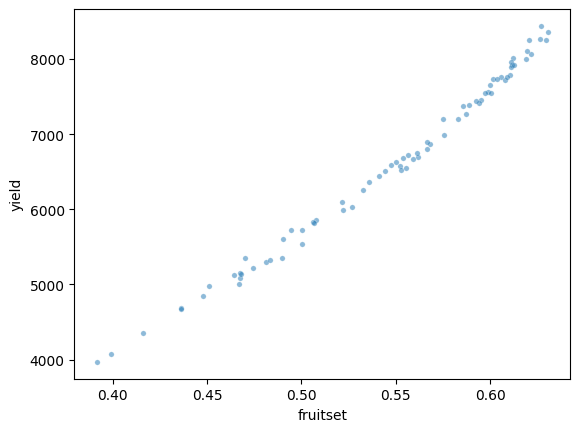

In [4]:
sns.scatterplot(df_berry2, x='fruitset', y='yield', s = 15, alpha=0.5)
plt.show()

In [5]:
# 절편을 따로 계산하지 않고 포함하여 구하기 위해 모든 값이 1인 열을 추가합니다.
X = df_berry2[['fruitset']].assign(
    const = 1
)
y = df_berry2['yield']
# 정규 방정식을 이용하여 회귀계수를 계산합니다. 
# np.linalg.inv : 역행렬을 구합니다.
# np.ndarray.dot: 벡터일때는 내적, 행렬일 때는 행렬곱을 계산합니다.
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
beta_hat

array([18664.94491423, -3595.388558  ])

In [6]:
df_berry[['fruitset']].agg(['min', 'max']).assign(const=1).dot(beta_hat)

min       1.937222
max    8576.844939
dtype: float64

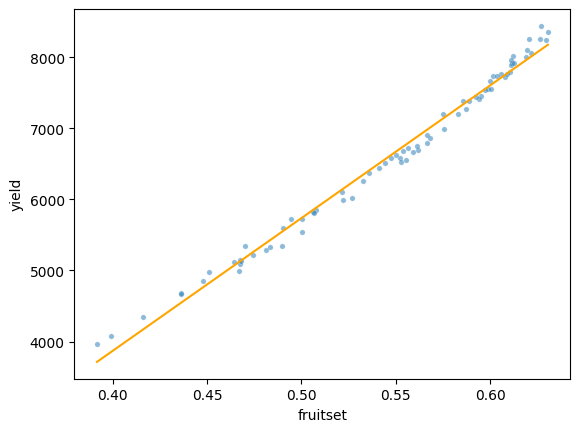

In [7]:
sns.scatterplot(df_berry2, x='fruitset', y='yield', s = 15, alpha=0.5)
plt.plot(
    df_berry2[['fruitset']].agg(['min', 'max']), 
    df_berry2[['fruitset']].agg(['min', 'max']).assign(const=1).dot(beta_hat),
    color = 'orange'
)
plt.show()

선형 회귀 분석 모듈:

**statsmodels.api.OLS**, **statsmodels.formula.api.ols**

In [8]:
from statsmodels.api import OLS

lm = OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     6515.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           6.82e-74
Time:                        20:06:09   Log-Likelihood:                -474.32
No. Observations:                  76   AIC:                             952.6
Df Residuals:                      74   BIC:                             957.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fruitset    1.866e+04    231.246     80.715      0.000    1.82e+04    1.91e+04
const      -3595.3886    127.259    -28.253      0.000   -3848.957   -3341.820
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.934
Skew:                           0.351   Prob(JB):                        0.380
Kurtosis:                       2.656   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from statsmodels.formula.api import ols
# patsy formula를 통해 종속변수와 독립 변수를 정의합니다.
lm = ols('yield_ ~ fruitset', data=df_berry2.rename(columns={'yield': 'yield_'})).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yield_   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     6515.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           6.82e-74
Time:                        20:06:09   Log-Likelihood:                -474.32
No. Observations:                  76   AIC:                             952.6
Df Residuals:                      74   BIC:                             957.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3595.3886    127.259    -28.253      0.000   -3848.957   -3341.820
fruitset    1.866e+04    231.246     80.715      0.000    1.82e+04    1.91e+04
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.934
Skew:                           0.351   Prob(JB):                        0.380
Kurtosis:                       2.656   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

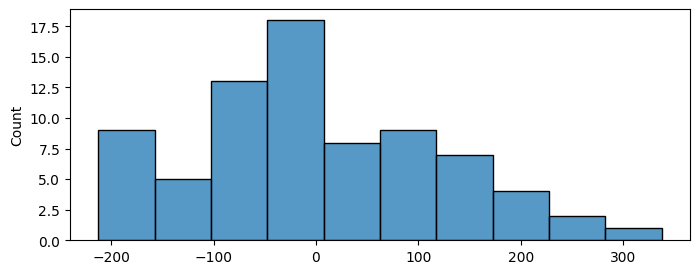

In [10]:
plt.figure(figsize=(8,3))
sns.histplot(lm.resid, bins=10)
plt.show()

## 2. 적합도(The goodness-of-fit)

$\sum_{i=1}^n{\left(y_i - \bar{y}\right)^2} = \sum_{i=1}^n{\left(\hat{y_i} - \bar{y}\right)^2} + \sum_{i=1}^n{\left(y_i - \hat{y_i}\right)^2}$

SST = SSR + SSE

SST (Sum of squares Total, TSS:Total sum os squares): 전체 변동성 - 평균에서 얼마나 데이터들이 떨어져 있는지는 나타냅니다.

SSR (Sum of Squared Regression, ESS:Explained sum of squares): 모델에 의해 설명된 변동성

SSE(Sum of squares of errors, RSS:Residual sum of squares): 모델에 의해 설명되지 못한 변동성

**증명**

$SST = ||y - \bar{y}1||^2 = ||y - \hat{y} + \hat{y} - \bar{y}1||^2$

$ = ||y - \hat{y}1||^2 + ||\hat{y} - \bar{y}||^2 + 2<y - \hat{y}, \hat{y} - \bar{y}>$

$ = SSE + SSR + 2(\hat{e}^TX)\hat{\beta} - 2\bar{y}\hat{\epsilon}^T1$, $\hat{\epsilon}=y - \hat{y}$

> $(\hat{e}^TX) = (y - \hat{y})^TX = (y - X(X^TX)^{-1}X^Ty)^TX = y^TX - y^TX(X^TX)^{-1}X^TX = 0$

> $\hat{\epsilon}^T1 = \sum_{i=1}^{n}{y_i - \hat{y_i}}=0$


$ = SSE + SSR$

**결정 계수(Coefficient of determination)**

$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$: 전체 변동성에서 회귀식에 의해 설명된 변동성의 비율


**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 SST, SSR, SSE를 구해 봅니다.
    
</div>

In [11]:
s_prd = df_berry2[['fruitset']].assign(const=1).dot(beta_hat)
sse = ((df_berry2['yield'] - s_prd) ** 2).sum()
ssr = ((s_prd - df_berry2['yield'].mean()) ** 2).sum()
sst = ((df_berry2['yield'] - df_berry2['yield'].mean()) ** 2).sum()

In [12]:
sst, ssr, sse, ssr + sse

(104426682.46588431,
 103253862.22145344,
 1172820.2444328119,
 104426682.46588625)

In [13]:
r2_1 = ssr / sst
r2_2 = 1 - sse / sst
r2_1, r2_2

(0.9887689600326619, 0.9887689600326434)

In [14]:
print(lm.ssr, lm.ess)

1172820.2444328114 103253862.2214515


**수정된 결정 계수**

$R^2$는 독립 변수가 종속 변수와 실제로 관련이 없더라도, 독립 변수의 수를 많이 가져갈 수록 높아지는 경향이 있습니다. 

(p개의 모수(회귀 계수 + 절편)를 지닌 선형모델은 적어도 p개의 점은 오차 없이 예측할 수 있습니다.)

따라서 회귀 계수의 모수의 수에 따른 패널티를 가하여 결정계수를 수정한 것이 수정된 결정 계수 입니다. 

$Adjusted R^2=1 - \frac{MSE}{MST} = 1 - \frac{SSE/(n - p)}{SST/(n - 1)}$

In [15]:
p = 2
n = len(df_berry2)
print("Adjusted R2", 1 - (sse / (n - p)) / (sst / (n - 1)))

Adjusted R2 0.9886171892222736


### 회귀 모델의 유의성 검정

**SSR(모델이 설명한 변동성), SSE(모델이 설명하지 못한 변동성)을 이용한 F-test**

$H_0$: 모든 회귀계수(절편 제외)는 0이다.$(\beta_1 = \beta_2 = ... \beta_k = 0) \equiv MSR <= MSE$, 회귀 모델은 유의미 하지 않다.

$H_1$: 회귀계수(절편 제외)중 적어도 하나는 0이 아니다.$(\beta_1 \ne 0\,or\,\beta_2 \ne 0\,...\,or\,\beta_k \ne 0) \equiv MSR > MSE$, 회귀 모델은 유의미하다.

$MSR = \frac{SSR}{df_R}$, 회귀모델의 모수의 수가 p일 때, 평균에 의해 고정되므로 1개가 차감됩니다. 따라서 p - 1

$MSE = \frac{SSE}{df_E}$, 모수가 p개는 p개의 표본에 대해서는 오차가 0으로 고정이 됩니다. 따라서 MSE p개 만큼의 표본이 고정되므로 자유도는 n - p 가 됩니다.

$F = \frac{MSR}{MSE}\sim F(p - 1, n - p)$

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 F-test를 수행해봅니다.
    
</div>

In [16]:
from scipy.stats import f
n = len(df_berry2)
df_ssr = 1
df_sse = n - 2
F = (ssr / df_ssr) / (sse / df_sse)
pvalue = f.sf(F, df_ssr, df_sse)
print("SSR 자유도: {}, SSE 자유도: {}, 검정통계량: {}, pvalue: {}".format(df_ssr, df_sse, F, pvalue))

SSR 자유도: 1, SSE 자유도: 74, 검정통계량: 6514.882259798234, pvalue: 6.819989886213649e-74


In [17]:
print(lm.fvalue, lm.f_pvalue)

6514.882259798114 6.8199898862182484e-74


**회귀 계수의 유의성 검정**

$H_0: \beta_i = 0$

$H_1: \beta_i \ne 0$

$H_0$가 맞다면, 

$\mu_{\hat{\beta_i}}$ = 0

$s_{\hat{\beta_i}}=\sqrt{\frac{\frac{1}{n - p}\sum_{i=1}^{n}\hat{\epsilon_i^2}}{\sum_{i=1}^n\left(x_i - \bar{x}\right)^2}}$

$t = \frac{\hat{\beta_i} - \mu_{\hat{\beta_i}}}{s_{\hat{\beta}}}= \frac{\hat{\beta_i}}{s_{\hat{\beta}}} \sim t(n - p)$

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 회귀계수에 대한 회귀 계수의 유의성 검정을 해봅니다.
    
</div>

In [18]:
n = len(df_berry2)
p = 2

s_beta_hat = ((sse / (n - p)) / ((df_berry2['fruitset'] - df_berry2['fruitset'].mean()) ** 2).sum()) ** 0.5
s_beta_hat

231.2455727733877

In [19]:
from scipy.stats import t

# 양측 검증이므로 왼쪽의 꼬리영역을 모든 경우에 구하도록 -abs를 통계량에 적용합니다.
t_stat = -abs(beta_hat[0] - 0) / s_beta_hat
print("검정통계량: {}, pvalue: {}".format(t_stat, t.cdf(t_stat, n - p) * 2))

검정통계량: -80.71482057093502, pvalue: 6.819989886213796e-74


In [20]:
lm.tvalues, lm.pvalues

(Intercept   -28.252552
 fruitset     80.714821
 dtype: float64,
 Intercept    2.204123e-41
 fruitset     6.819990e-74
 dtype: float64)

### AIC (Akaike Information Criterion)

$AIC = 2k - 2 ln(L)$, L 모델의 데이터에 대한 최대우도입니다. k:는 모델의 모수의 수

우도가 클수록 모델이 데이터를 잘 설명하는 것입니다. 

따라서 L을 0과 1사이의 수이므로 AIC가 작을 수록 모델이 데이터를 잘 설명하는 것입니다.

선형 회귀 모델의 AIC

$AIC = 2p + nln(2 \pi) + nln(\frac{SSE}{n}) + n$, n: 표본수, p: 선형 회귀 모델의 모수의 수

상대적 비교 지표이므로, 상수항을 제외하여 나타낼 수도 있습니다.

$AIC = 2p + n ln(\frac{SSE}{n})$

유도 과정입니다.

> $y_i = x_i^T \beta + \epsilon_i$
> 
> $\epsilon_i \sim N(0, \sigma^2)$,  선형 회귀 모델 가정입니다.
>
> 이는 곧, $L(\beta, \sigma^2|y, X) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{(y_i-x_i^T\beta)^2}{2\sigma^2}))$
> 
> 여기에 log 양변에 취하여 로그우도를 취하여 정리합니다.
> 
> $lnL(\beta, \sigma^2|y, X) = -\frac{n}{2}ln(2 \pi \sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - x_i^T\beta)^2$
>
> 우도를 최대화하는 \sigma와 \beta는 회귀 계수의 추정 과정으로 도출됩니다. 
>
> $lnL(\beta, \sigma^2|y, X) = -\frac{n}{2}(ln(2 \pi) + ln(\sigma^2)) - \frac{SSE}{2\sigma^2}$
>
> 이 때 $\sigma^2 = \frac{SSE}{n}$ 가 됩니다. 
>
> $lnL(\beta, \sigma^2|y, X) = -\frac{n}{2}(ln(2 \pi) + ln(\frac{SSE}{n})) - \frac{n}{2}$
>
> 이를 AIC 에 대입하면, 이와함께 k를 회귀 계수의 모수의 수 p로 합니다.
>
> $AIC = 2p + nln(2 \pi) + nln(\frac{SSE}{n}) + n$
>
> 성능 비교를 위해 영향을 주지 않는 상수항($n×ln(2 \pi) + n$)을 정리하면 아래와 같이 
>
> $AIC = 2p +  nln(\frac{SSE}{n})$ 이 됩니다.


**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 AIC 를 statsmodels를 기준으로 직접 구해봅니다.

statsmodels의 summary 항목을 봅니다.
    
</div>

In [21]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yield_   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     6515.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           6.82e-74
Time:                        20:06:09   Log-Likelihood:                -474.32
No. Observations:                  76   AIC:                             952.6
Df Residuals:                      74   BIC:                             957.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3595.3886    127.259    -28.253      0.000   -3848.957   -3341.820
fruitset    1.866e+04    231.246     80.715      0.000    1.82e+04    1.91e+04
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.934
Skew:                           0.351   Prob(JB):                        0.380
Kurtosis:                       2.656   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**statsmodels에서의 AIC는 위에 유도과정에서의 로그 우도의 상수항까지 포함하고 있습니다.**

$AIC = 2p + nln(2 \pi) + nln(\frac{SSE}{n}) + n$

In [22]:
# statsmodels에서의 AIC는 로그 우도의 상수항까지 포함하고 있습니다. 이를 반영하여 AIC를 뽑아 봅니다.
log_likelihood = (-n / 2 * (np.log(sse / n) + np.log(2 * np.pi))  -n/2)
AIC = 2 * log_likelihood + 2 * p
log_likelihood, AIC

(-474.3184927130832, -944.6369854261663)

### BIC(Bayesian Information Criterion)

BIC는 AIC보다 변수의 수에 더 많은 페널티를 부여합니다. 

$BIC = pln(n) - 2ln L$ 입니다.

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 BIC 를 statsmodels를 기준으로 직접 구해봅니다.

statsmodels의 summary 항목을 봅니다.
    
</div>

$BIC = pln(n) + nln(2 \pi) + nln(\frac{SSE}{n}) + n$

In [23]:
log_likelihood = (-n / 2 * (np.log(sse / n) + np.log(2 * np.pi))  -n / 2)
BIC = -2 * log_likelihood + np.log(n) * p
log_likelihood, BIC

(-474.3184927130832, 957.298452106739)

## 3. 이상점과 영향점

**이상점**: 보편적인 분포에 벋어난 관측치

**영향점**: 이상점 중에서 회귀 분석 결과에 큰 영향을 미치는 소수의 관측치

**이상점 판별법**

1. 시각화


2. 점 하나씩 제외해보고, 회귀계수의 변화의 정도를 측정


3. 통계량

**레버리지(Leverage)**:  i번째 관측치와 평균 관측치의 거리, i번째 종속변수가 i번째 적합값(fitted value)에 미치는 영향도

> $h_{ii} = x_i^T(X^TX)^{-1}x_i$, $X$는 디자인 행렬, $x_i$는 i번째 관측치에 해당하는 벡터
>
> $0 \le h_{ii} \le 1$


**표준화 잔차(studentized residual)**: i번째 관측치의 상대적 잔차

> $t_i = \frac{\hat{e_i}}{\sqrt{MSE(1-h_{ii})}}$

**DFFITs(difference in fit(s))**: i번째 관측치를 제거했을 때 적합값(fitted value)의 변동량

> $DFFITS = \frac{\hat{Y_i} - \hat{Y_{i(i)}}}{\sqrt{MSE_{(i)}h_{ii}}}$
>
> $\hat{Y_{i(i)}}$: i번째 관측치를 제외하고 적합시킨 회귀모델의 적합값(fitted value)
>
> $MSE_{(i)}$: i번째 관측치를 제외하고 회귀모델을 적합시켰을 때의 MSE

**DFBETAS(difference in beta(s))**: i번째 관측치를 제거했을 때, 회귀계수의 변동량

> $DFBETAS_{ij} = \frac{\hat{\beta_j} - \hat{\beta_{(i))j}}}{\sqrt{MSE_{(i)}C_{jj}}}$
>
> $C_{jj}$: $(X^TX)^{-1}$의 대각 요소중 j번째 값

**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델에서 영향점 분석을 해봅니다.
    
</div>

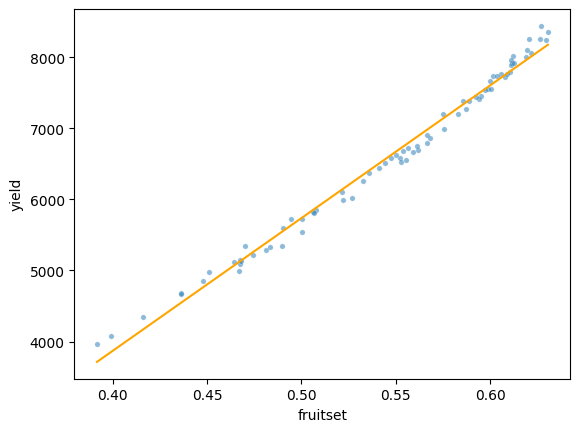

In [24]:
sns.scatterplot(df_berry2, x='fruitset', y='yield', s = 15, alpha=0.5)

plt.plot(
    df_berry2[['fruitset']].agg(['min', 'max']), 
    df_berry2[['fruitset']].agg(['min', 'max']).assign(const=1).dot(beta_hat),
    color = 'orange'
)

plt.show()

**Leverage**

$h_{ii} = x_i^T(X^TX)^{-1}x_i$, $X$는 디자인 행렬, $x_i$는 i번째 관측치에 해당하는 벡터

$h$: i번째 요소가 $h_{ii}$ 인 벡터, H를 구해 봅니다.

In [25]:
h = np.diagonal(
    np.dot(
        np.dot(X, np.linalg.inv(np.dot(X.T, X))), X.T
    )
)
h

array([0.01523545, 0.01393721, 0.03463865, 0.0943925 , 0.01325499,
       0.0186333 , 0.02409748, 0.07061227, 0.01596129, 0.02270438,
       0.01829397, 0.05457602, 0.02109729, 0.03449118, 0.01327086,
       0.03431945, 0.02739609, 0.03631289, 0.01367082, 0.03094264,
       0.0145278 , 0.01386002, 0.03434626, 0.08663494, 0.01332159,
       0.02080256, 0.02047877, 0.0545788 , 0.01755107, 0.02486817,
       0.01530754, 0.04629064, 0.02237219, 0.03212922, 0.01328602,
       0.03307878, 0.02567748, 0.03689312, 0.01346479, 0.02390718,
       0.01820326, 0.02678714, 0.01355782, 0.0440468 , 0.02169312,
       0.03098493, 0.01319579, 0.02776659, 0.02619731, 0.0307663 ,
       0.01467346, 0.01873598, 0.01589332, 0.02321239, 0.01383219,
       0.03612474, 0.02284276, 0.02751387, 0.0131588 , 0.02676944,
       0.02709694, 0.03475727, 0.01449145, 0.01856223, 0.01917294,
       0.02403578, 0.01318245, 0.03422745, 0.02030775, 0.02707699,
       0.01339857, 0.02234441, 0.02779673, 0.03144839, 0.01445

**표준화 잔차를 구해봅니다.**

$t_i = \frac{\hat{e_i}}{\sqrt{MSE(1-h_{ii})}}$

$t_{std}$: i번째 요소가 $t_i$인 벡터를 만들어 봅니다.

In [26]:
mse = sse / (n - 2)
t_std = (df_berry2['yield'] - s_prd) / np.sqrt((mse * (1- h)))
t_std

51    -1.206325
52    -1.620375
55    -0.982278
56     2.124771
67    -1.054218
         ...   
328    0.752778
339    0.602520
340    2.178132
343   -1.406458
344   -0.088764
Length: 76, dtype: float64

**DFFITs, DFBETAS를 구해봅니다.**

$DFFITs = \frac{\hat{Y_i} - \hat{Y_{i(i)}}}{\sqrt{MSE_{(i)}h_{ii}}}$

$DFBETAS_{ij} = \frac{\hat{\beta_j} - \hat{\beta_{(i))j}}}{\sqrt{MSE_{(i)}C_{jj}}}$

> $\hat{Y_{i(i)}}$: i번째 관측치를 제외하고 적합시킨 회귀모델의 적합값(fitted value)
>
> $MSE_{(i)}$: i번째 관측치를 제외하고 회귀모델을 적합시켰을 때의 MSE
>
$C_{jj}$: $(X^TX)^{-1}$의 대각 요소중 j번째 값

In [27]:
def get_stat_without_i(df, x):
    """
    df의 mse를 구하고, x의 예측값을 구합니다. 
    dffits는 데이터 포인트를 제외한 나머지 데이터로 선형 모델을 학습시키고,
    MSE를 구하고 제외한 데이터 포인트로 예측값이 필요합니다.
    df에는 x를 제외한 나머지 데이터를 전달받습니다.
    Parameters:
        df: pd.DataFrame
            선형모델을 학습시키고, mse를 구할 데이터
        x: pd.Series
            예측값을 만들 데이터
    Returns:
        float, float
            MSE_i, yii_hat
    """
    lm = ols('yield_ ~ fruitset', data=df.rename(columns={'yield': 'yield_'})).fit()
    return pd.concat([
        pd.Series([lm.mse_resid, lm.predict(x).values[0]], index=['MSE_i', 'yii_hat']),
        lm.params
    ], axis=0)
C = np.linalg.inv(df_berry2[['fruitset']].assign(const=1).pipe(lambda x: x.T.dot(x)))
df_fit_without_i = df_berry2.apply(
    lambda x: get_stat_without_i(
        df_berry2.loc[df_berry2.index != x.name], x
    ), axis=1
).assign(
    dffits = lambda x: (s_prd - x['yii_hat']) / ((x['MSE_i'] * h) ** 0.5),
    dfbetas0 = lambda x: (lm.params['Intercept'] - x['Intercept']) / ((x['MSE_i'] * C[1, 1]) ** 0.5),
    dfbetas1 = lambda x: (lm.params['fruitset'] - x['fruitset']) / ((x['MSE_i'] * C[0, 0]) ** 0.5)
)
df_fit_without_i.head()

,MSE_i,yii_hat,Intercept,fruitset,dffits,dfbetas0,dfbetas1
51,15750.090078,6149.116094,-3586.369263,18652.132009,-0.150516,-0.071096,0.055582
52,15495.987537,6896.472823,-3598.445145,18675.478895,-0.194823,0.024291,-0.046069
55,15856.549262,5125.016670,-3575.206227,18631.061461,-0.186022,-0.158555,0.146491
56,15085.861021,3687.242336,-3679.548291,18812.103690,0.703114,0.677846,-0.652270
67,15824.741675,6711.841782,-3594.952802,18667.363185,-0.122278,-0.003427,-0.010466


In [28]:
# statmodels로 여러 이상점 판단지표를 구해봅니다.
influence = lm.get_influence()

df_influence = pd.concat([
    pd.Series(influence.resid_studentized, name='studentized residuals'),
    pd.Series(influence.dffits[0], name='dffits'),
    pd.DataFrame(influence.dfbetas, columns=['dfbetas0', 'dfbetas1']),
], axis=1).set_index(df_berry2.index)
df_influence

,studentized residuals,dffits,dfbetas0,dfbetas1
51,-1.206325,-0.150516,-0.071096,0.055582
52,-1.620375,-0.194823,0.024291,-0.046069
55,-0.982278,-0.186022,-0.158555,0.146491
56,2.124771,0.703114,0.677846,-0.652270
67,-1.054218,-0.122278,-0.003427,-0.010466
...,...,...,...,...
328,0.752778,0.113468,0.082166,-0.072755
339,0.602520,0.101439,-0.065219,0.073614
340,2.178132,0.402954,-0.275743,0.307305
343,-1.406458,-0.171468,0.032416,-0.051313


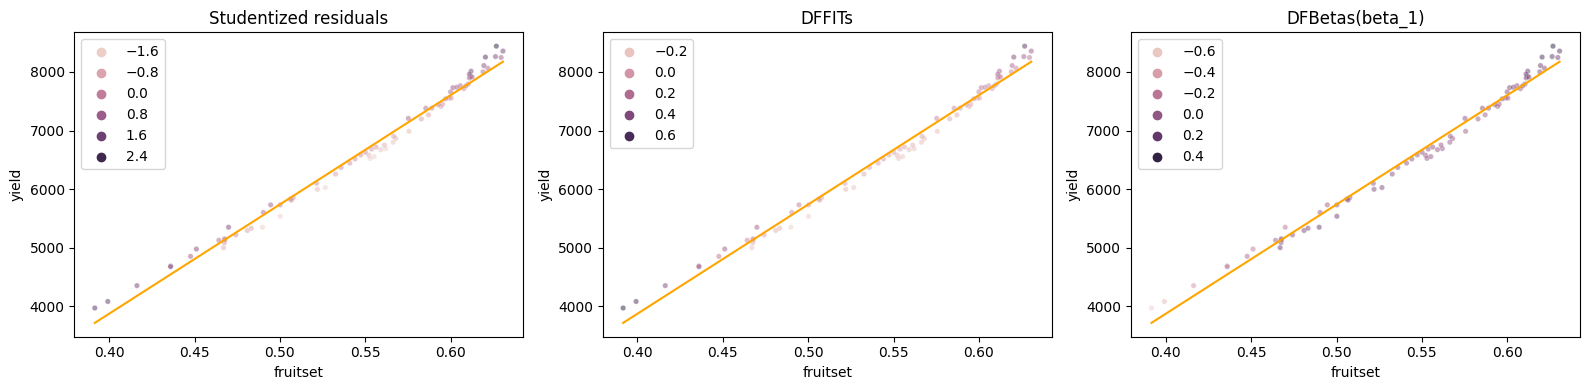

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for val, i, ax in zip(
        [influence.resid_studentized, influence.dffits[0], influence.dfbetas[:, 1]], 
        ['Studentized residuals', 'DFFITs', 'DFBetas(beta_1)'], 
        axes
    ):
    sns.scatterplot(
        x=df_berry2['fruitset'].values, 
        y=df_berry2['yield'].values, s = 15, alpha=0.5, 
        hue=val, ax=ax
    )

    ax.plot(
        df_berry2[['fruitset']].agg(['min', 'max']), 
        df_berry2[['fruitset']].agg(['min', 'max']).assign(const=1).dot(beta_hat),
        color = 'orange'
    )

    ax.set_title(i)
    ax.set_xlabel('fruitset')
    ax.set_ylabel('yield')

plt.tight_layout()
plt.show()

**Cook's Distance**

$D_i = \frac{\sum_{j=1}^{n}\left(\hat{y_j} - \hat{y_{j(i)}}\right)^2}{pMSE}$

> $\hat{y_{j(i)}}$: i를 제외한 회귀 모델의 예측값
>
> $p$: 회귀 모델의 모수의 수

In [30]:
def get_cooks_num(df):
    """
    하나의 데이터 포인트를 데이터프레임으로 학습하여 선형회귀모델을 만들고,
    이를 통한 모든 데이터프레임(df_berry2)의 예측결과와 
    제외하지 않은 선형회귀 모델의 예측값 (s_prd)와의 차이의 제곱합을 구합니다.
    
    Parameters:
        df: pd.DataFrame
            선형모델을 학습시킬 데이터
    Returns:
        float
            Coook Distance의 분자항
    """
    lm = ols('yield_ ~ fruitset', data=df.rename(columns={'yield': 'yield_'})).fit()
    return np.sum((s_prd - lm.predict(df_berry2).values) ** 2)

df_berry2.apply(
    lambda x: get_cooks_num(df_berry2.loc[df_berry2.index != x.name]), axis=1
).rename('num') / (lm.mse_resid * 2)

51     0.011257
52     0.018555
55     0.017311
56     0.235284
67     0.007465
         ...   
328    0.006476
339    0.005190
340    0.077022
343    0.014504
344    0.000082
Name: num, Length: 76, dtype: float64

### 다중 공선성(multicolinearity)

- 다중공선성은 다중 선형 회귀 모델의 독립 변수간에 발생하는 문제입니다.

- 다중 선형 회귀에서 독립변수들 간에 강한 선형관계가 존재하는 경우를 말합니다.

#### 다중 선형 회귀(Multiple Linear Regression)

- 독립 변수의 수가 여러  개인 선형 회귀 모델

※ 다중 선형 회귀 분석의 표준화 또는 정규화

> 독립 변수의 변수폭(스케일, Scale)을 균일화를 시켜 계수의 크기로 종속변수에 주는 영향도의 비교를 용이하게 합니다.


#### 다중공선성의 영향

- 불안정한 모델: 회귀계수 추정량의 변동성이 커져, 데이터가 조금만 바뀌어도 변동성이 커집니다.


- 완전한 다중공선성: 독립변수들 간에 완벽한 선형 관계가 있는 경우

> OLS: $\hat{\beta}=(X^TX)^{-1}X^Ty$ 에서 $(X^TX)^{-1}$가 존재하지 않습니다. 
>
> 제대로된 회귀 계수를 얻을 수 없어, 반드시 해소해야 합니다.
>
> Ex) 범주형 변수를 가변수화 하면 이들 간에 완벽한 공선성을 지니게 됩니다. 가변수 중 하나를 제거합니다.


#### 다중공선성 진단

- 시각화: Ex) 독립 변수간에 산점도 출력, 


- 상관행렬 도출


- 독립 변수 마다 VIF(variance inflation factor) 측정

#### 해결 방안

- 변수 선택


- 차원 축소

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_berry2에서 yield 는 종속 변수 fruitset, fruitmass, seed은 독립 변수로 회귀 모델을 만들어 봅니다.

fruitset, fruitmass, seed를 표준화 합니다.
    
</div>

In [31]:
from scipy.stats import zscore
from statsmodels.api import add_constant

In [32]:
X_cols = ['fruitmass', 'fruitset', 'seeds']
X2 = add_constant(zscore(df_berry2[X_cols]))

In [33]:
# OLS의 해를 직접구해봅니다.
np.dot(np.linalg.inv(X2.T.dot(X2)), np.dot(X2.T, y))

array([ 6609.94253637, -2331.35215554,   940.43623399,  2564.02706691])

In [34]:
lm2 = OLS(y, X2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.31e-80
Time:                        20:06:11   Log-Likelihood:                -448.72
No. Observations:                  76   AIC:                             905.4
Df Residuals:                      72   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6609.9425     10.453    632.340      0.000    6589.105    6630.780
x1         -2331.3522   1396.210     -1.670      0.099   -5114.645     451.941
x2           940.4362    317.907      2.958      0.004     306.699    1574.173
x3          2564.0271   1096.803      2.338      0.022     377.590    4750.465
==============================================================================
Omnibus:                        3.761   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.985
Skew:                           0.370   Prob(JB):                        0.225
Kurtosis:                       3.628   Cond. No.                         298.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[Ex.9]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_berry2에서 yield 는 종속 변수 fruitset, fruitmass, seed은 독립 변수로 회귀 모델에서의 
    
다중 공선성 현상을 조사합니다.
    
그리고 VIF를 기준으로 변수를 선택하여 해소하는 방법과,
    
PCA를 사용하여 해소하는 방법을 보입니다.
    
</div>

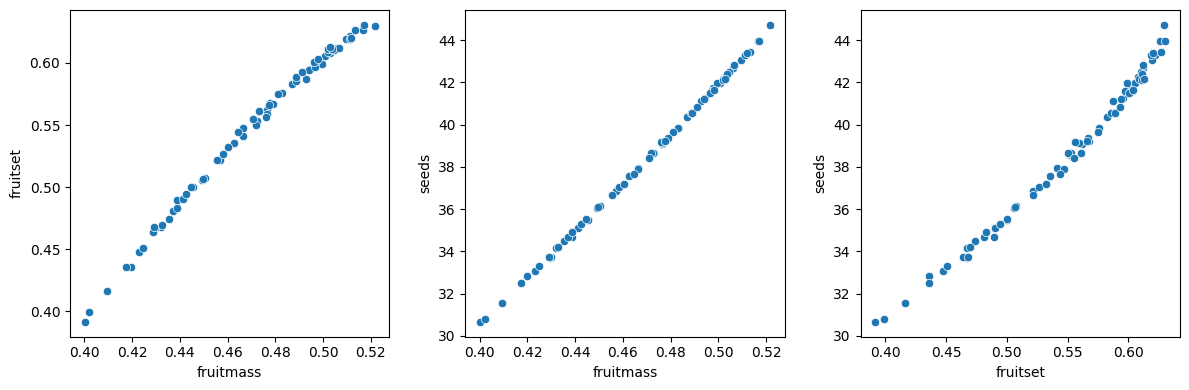

In [35]:
import itertools
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for (x_, y_), ax in zip(itertools.combinations(X_cols, 2), axes):
    sns.scatterplot(data=df_berry2, x=x_, y=y_, ax=ax)
plt.tight_layout()
plt.show()

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vifs = [variance_inflation_factor(X2, i) for i in range(3)]
vifs, X_cols[np.argmax(vifs)]

([1.0000000000000002, 17840.509291167236, 924.9268899020105], 'fruitset')

In [37]:
X3 = add_constant(zscore(df_berry2[['fruitmass', 'seeds']]))

lm3 = OLS(y, X3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5647.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           9.53e-81
Time:                        20:06:11   Log-Likelihood:                -453.08
No. Observations:                  76   AIC:                             912.2
Df Residuals:                      73   BIC:                             919.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6609.9425     10.994    601.227      0.000    6588.031    6631.854
x1          1627.4627    418.716      3.887      0.000     792.964    2461.961
x2          -459.2605    418.716     -1.097      0.276   -1293.759     375.238
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.536
Skew:                           0.106   Prob(JB):                        0.765
Kurtosis:                       2.648   Cond. No.                         76.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vifs = [variance_inflation_factor(X3, i) for i in range(1, 3)]
vifs

[1450.5047348236114, 1450.5047348236114]

In [39]:
lm3 = OLS(y, df_berry2[['fruitset']].assign(const=1)).fit()
lm3.rsquared_adj

0.9886171892222737

In [40]:
lm3 = OLS(y, df_berry2[['seeds']].assign(const=1)).fit()
lm3.rsquared_adj

0.9921447138547256

In [41]:
lm3 = OLS(y, df_berry2[['seeds']].assign(const=1)).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     9474.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           7.46e-80
Time:                        20:06:11   Log-Likelihood:                -460.22
No. Observations:                  76   AIC:                             924.4
Df Residuals:                      74   BIC:                             929.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
seeds        321.7481      3.306     97.333      0.000     315.162     328.335
const      -5783.7003    127.896    -45.222      0.000   -6038.539   -5528.861
==============================================================================
Omnibus:                        2.719   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.273
Skew:                          -0.132   Prob(JB):                        0.321
Kurtosis:                       3.805   Cond. No.                         413.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca = PCA()
pca.fit(X2[:, :-1])
pca.explained_variance_ratio_

array([0.99794425, 0.00205575, 0.        ])

In [43]:
pca = make_pipeline(StandardScaler(), PCA(n_components=1))
X_pca = pca.fit_transform(X2[:, :-1])

In [44]:
from statsmodels.api import add_constant
lm3 = OLS(y, add_constant(X_pca)).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           7.28e-82
Time:                        20:06:12   Log-Likelihood:                -455.47
No. Observations:                  76   AIC:                             914.9
Df Residuals:                      74   BIC:                             919.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6609.9425     11.269    586.570      0.000    6587.489    6632.396
x1          -826.8765      7.976   -103.665      0.000    -842.770    -810.983
==============================================================================
Omnibus:                        0.814   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.896
Skew:                           0.227   Prob(JB):                        0.639
Kurtosis:                       2.724   Cond. No.                         1.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Mallow's Cp

OLS 방식으로 측정된 선형 회귀 모델을 대상으로하는 지표입니다. 독립 변수의 수를 많이 가져갈 수록 회귀 모델의 잔차 제곱합은 작아집니다.

비록 추가된 독립 변수의 종속 변수와 연관성이 없더라고 변수를 추가 한 것 만으로도 잔차 제곱합의 감소를 효과를 얻을 수 있습니다.

이러한 특성하에서 Mallow's Cp는 독립 변수의 일부로 모델을 구성할 때 가장 좋은 모델을 선택하기 위한 기준을 제공합니다.

전체 K 개의 독립 변수에서 중에서 P개의 독립 변수를 선택한 회귀 모델에 대한 지표입니다. 

$C_P = \frac{SSE_p}{S^2} - N + 2(P + 1)$

> $SSE_P = \sum_{i=1}^N(Y_i - \hat{Y}_{pi})^2 $
>
> $\hat{Y}_{pi}$ 는 선택한 P개의 변수에 의한 회귀 모델의 i번재 관측치의 예측값
>
> $S^2$은 K개의 변수로 측정된 MSE (절편이 있는 모델이고, 자유도 = N - K)
>
> N은 표본수

Mallow's Cp의 의미

Cp가 p + 1와 유사할 때 : 모형이 적절하게 맞추어져 있고 모형이 편향되지 않았다고 판단할 수 있습니다. 

Cp가 p + 1보다 클 때: 편향이 큰 상태이고, 모델이 제대로 적합이 되지 않음을 나타냅니다

Cp가 p + 1보다 작을 때: 샘플링 에러가 의심되는 상황이지만, 편향은 없다고 해석될 수 있습니다.


Mallow Cp를 통한 변수 선택

되도록, p + 1 에 가까운 변수를 선택합니다.

동일한 Cp일 경우 가능한 작은 값인 경우를 택합니다.

모든 속성을 사용했을 경우는 Cp는 p + 1 이 되고, 이는 분석상의 의미를 찾을 수는 없습니다.

같은 수치의 Cp일 때 여럿일 경우 연구 목적에 맞는 값을 선택합니다.


출처: https://online.stat.psu.edu/stat462/node/197/

**[Ex.10]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_berry2에서 yield 는 종속 변수 fruitset, fruitmass, seeds은 독립 변수로 회귀 모델에서, 

1) 제시한 모든 종속 변수를 사용할 경우의 Cp 
    
2) 독립 변수 fruitset, fruitmass에 대한 Cp를 구해봅니다.
    
3) 독립 변수 fruitset를 사용할 때 Cp를 구해봅니다.
    
</div>

In [45]:
from statsmodels.formula.api import ols
# patsy formula 를 기반으로한 ols api을 이용합니다.
lm = ols('yield_ ~ fruitset + fruitmass + seeds', data=df_berry2.rename(columns={'yield': 'yield_'})).fit()
S2 = lm.mse_resid
S2

8304.386167439936

In [46]:
# 모든 종속 변수를 사용했을 때 Cp
SSE_p = np.sum(lm2.resid ** 2)
P = 3
N = len(df_berry2)
Cp = SSE_p / S2 - N + 2 * (P + 1)
Cp

3.9999999999999574

In [47]:
# fruitset,fruitmass을 사용할 때 Cp
lm2 = ols('yield_ ~ fruitset + fruitmass', data=df_berry2.rename(columns={'yield': 'yield_'})).fit()
SSE_p = np.sum(lm2.resid ** 2)
P = 2
N = len(df_berry2)
Cp = SSE_p / S2 - N + 2 * (P + 1)
Cp

7.4649689946054

In [48]:
# fruitset을 사용할 때 Cp
lm2 = ols('yield_ ~ fruitset', data=df_berry2.rename(columns={'yield': 'yield_'})).fit()
SSE_p = np.sum(lm2.resid ** 2)
P = 1
N = len(df_berry2)
Cp = SSE_p / S2 - N + 2 * (P + 1)
Cp

69.22901088478241